Species index mapping:
  [ 0] Glycerol
  [ 1] N09D00
  [ 2] N10D00
  [ 3] N11D00
  [ 4] G_EMPTY_EMPTY_N09D00
  [ 5] G_EMPTY_N09D00_EMPTY
  [ 6] G_EMPTY_EMPTY_N10D00
  [ 7] G_EMPTY_N10D00_EMPTY
  [ 8] G_EMPTY_EMPTY_N11D00
  [ 9] G_EMPTY_N11D00_EMPTY
  [10] G_EMPTY_N09D00_N09D00
  [11] G_N09D00_EMPTY_N09D00
  [12] G_EMPTY_N10D00_N09D00
  [13] G_N09D00_EMPTY_N10D00
  [14] G_EMPTY_N11D00_N09D00
  [15] G_N09D00_EMPTY_N11D00
  [16] G_EMPTY_N09D00_N10D00
  [17] G_EMPTY_N09D00_N11D00
  [18] G_EMPTY_N10D00_N10D00
  [19] G_N10D00_EMPTY_N10D00
  [20] G_EMPTY_N11D00_N10D00
  [21] G_N10D00_EMPTY_N11D00
  [22] G_EMPTY_N10D00_N11D00
  [23] G_EMPTY_N11D00_N11D00
  [24] G_N11D00_EMPTY_N11D00
  [25] G_N09D00_N09D00_N09D00
  [26] G_N09D00_N09D00_N10D00
  [27] G_N09D00_N09D00_N11D00
  [28] G_N09D00_N10D00_N09D00
  [29] G_N09D00_N11D00_N09D00
  [30] G_N09D00_N10D00_N10D00
  [31] G_N09D00_N10D00_N11D00
  [32] G_N09D00_N11D00_N10D00
  [33] G_N09D00_N11D00_N11D00
  [34] G_N10D00_N09D00_N10D00
  [35] G_N10D00_

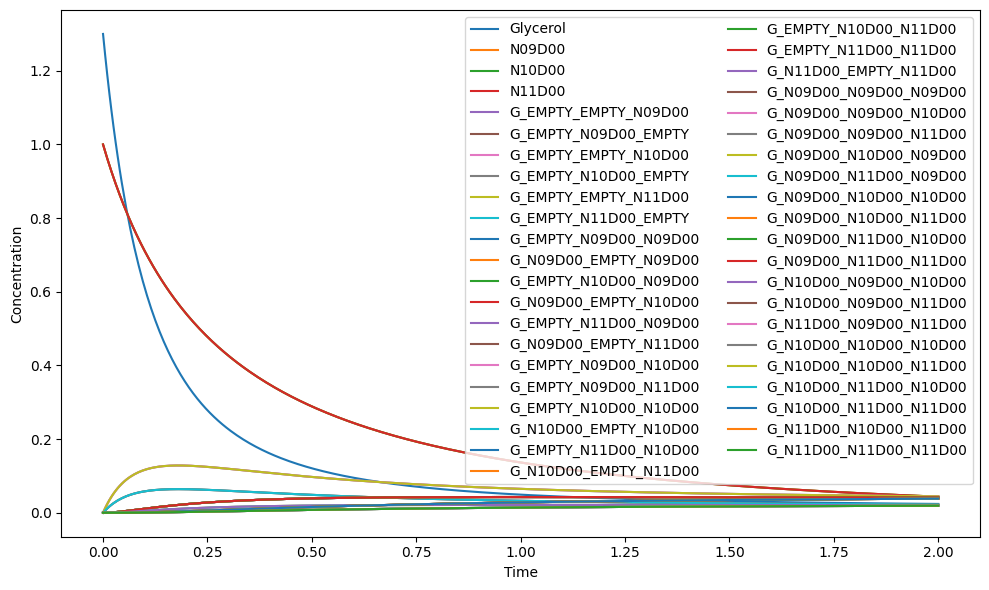

In [2]:
# testing esterification
from glyze import FattyAcid, Glyceride, ChemReactSim
import matplotlib.pyplot as plt

def plot(self, sol, show_species: list[str] | None = None, figsize=(10, 6)):
        """
        Plot specified species (or all if None)
        """
        if not sol.success:
            raise RuntimeError(f"Integration failed: {sol.message}")

        idxs = (
            range(len(self.species_names))
            if show_species is None
            else [self.species_names.index(nm) for nm in show_species]
        )

        plt.figure(figsize=figsize)
        for i in idxs:
            plt.plot(sol.t, sol.y[i, :], label=self.species_names[i])
        plt.xlabel("Time")
        plt.ylabel("Concentration")
        # plt.legend(loc="best", ncols=2)
        plt.tight_layout()
        plt.show()


fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)

# print(fa7.molar_mass)
# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa7, fa8, fa9, fa10, fa11, fa12], initial_conc = [110, 7.5, 22.4, 29.5, 21.2, 13.7, 5.8], chem_flag=True)
# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fatty_acid1, fatty_acid2, fatty_acid3, fatty_acid4, fatty_acid5, fatty_acid6], initial_conc = [1,1,1,1,1,1,1], chem_flag=True)
# sim.overall_order = 2.
sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa9, fa10, fa11], initial_conc = [1.3, 1, 1, 1], chem_flag=True)
t_span=(0.0, 2)
sol = sim.solve(t_span)
# y_t2 = sol.sol(2.0)  # returns full state vector at t=2
# print(y_t2)
sim.plot(sol=sol)